 Критерий Вальда для H0:a=3.0=a0 Против альтернативы H1:a=3.5 при известном sigma=2.2=sigma1

In [9]:
# Библиотеки. Начальные условия

import numpy as np
import math
import scipy.stats as sps
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn


alpha = 0.1
a0 = 3.0
##H_2 := alpha > a0

sigma0 = 2.1
##H_3 := sigma > sigma0

a1 = 3.5
##H_1 := alpha1 = 3.5


sigma1 = 2.2
eps = 0.1
n = 100

X = np.array([
    [-3.442,1.295,3.672,2.354,5.238,1.136,4.421,2.071,0.269,0.894],
    [8.202,0.605,-2.011,3.375,3.767,1.068,2.928,-0.276,4.924,3.31],
    [5.741,6.951,3.417,2.991,5.599,4.896,9.197,3.823,1.827,5.389],
    [2.504,4.212,-2.021,1.891,3.689,5.366,3.117,4.641,2.968,4.645],
    [3.752,4.582,3.601,0.934,2.785,3.294,4.695,1.092,3.155,4.352],
    [0.896,0.839,4.309,2.793,7.233,0.95,5.228,1.28,5.19,0.972],
    [4.562,1.915,4.243,4.495,0.648,5.34,3.294,2.791,6.805,3.474],
    [3.044,5.452,2.957,7.862,4.61,1.317,5.383,3.205,-1.022,3.602],
    [3.373,5.415,4.093,5.407,0.501,2.135,1.957,0.826,5.34,3.759],
    [1.735,-3.277,5.101,1.43,3.494,0.545,4.699,3.44,2.85,4.33]
])
X = np.transpose(X)


def arrN(X, a, sigma):
    arr = []
    for x in X:
        arr.append(sps.norm.pdf(x, a, sigma))
    return arr

In [10]:
# Выборка
print(X)

lst = []
for i in range(10):
        for j in X[i]:
            lst.append(j)


[[-3.442  8.202  5.741  2.504  3.752  0.896  4.562  3.044  3.373  1.735]
 [ 1.295  0.605  6.951  4.212  4.582  0.839  1.915  5.452  5.415 -3.277]
 [ 3.672 -2.011  3.417 -2.021  3.601  4.309  4.243  2.957  4.093  5.101]
 [ 2.354  3.375  2.991  1.891  0.934  2.793  4.495  7.862  5.407  1.43 ]
 [ 5.238  3.767  5.599  3.689  2.785  7.233  0.648  4.61   0.501  3.494]
 [ 1.136  1.068  4.896  5.366  3.294  0.95   5.34   1.317  2.135  0.545]
 [ 4.421  2.928  9.197  3.117  4.695  5.228  3.294  5.383  1.957  4.699]
 [ 2.071 -0.276  3.823  4.641  1.092  1.28   2.791  3.205  0.826  3.44 ]
 [ 0.269  4.924  1.827  2.968  3.155  5.19   6.805 -1.022  5.34   2.85 ]
 [ 0.894  3.31   5.389  4.645  4.352  0.972  3.474  3.602  3.759  4.33 ]]


In [11]:
# A, B, beta, C1

s1 = a0 + sigma1 * sps.norm.ppf(1 - alpha) / np.sqrt(n)
beta = sps.norm.cdf((s1 - a1) / sigma1 * np.sqrt(n), 0, 1)
print("beta = %.5f" % beta)

A = (1 - beta) / alpha
B = beta / (1 - alpha)
C1 = a0 + sigma1 * sps.norm.ppf(1 - alpha) / np.sqrt(n)

print("A = %.5f" % A)
print("B = %.5f" % B)
print("C1 = %.5f" % C1)


beta = 0.16080
A = 8.39200
B = 0.17867
C1 = 3.28194


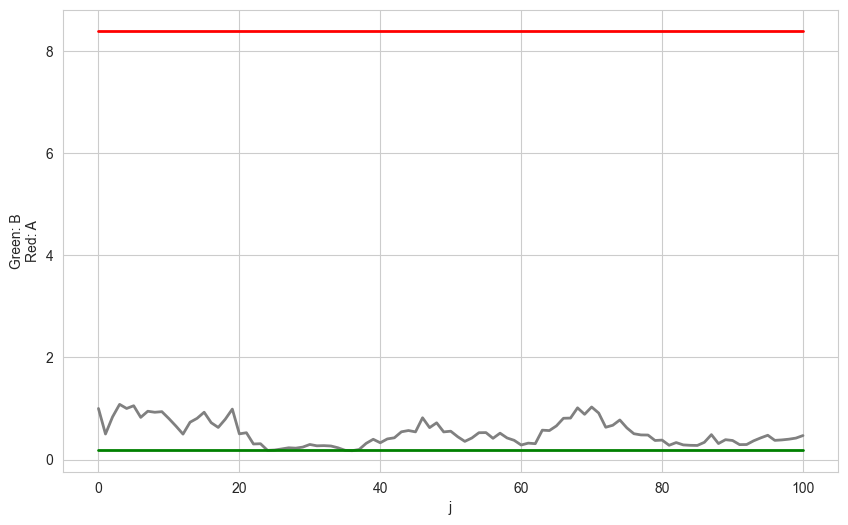

In [12]:
# График. Z(j)

def Z(j):
    return math.exp(j * (a0 * a0 - a1 * a1) / (2 * sigma1 * sigma1) + (a1 - a0) / (sigma1 * sigma1) * sum(lst[:j]))

plt.figure(figsize=(10,6))
seaborn.set_style("whitegrid")
j = np.arange(0, n + 1, 1)
plt.plot(j, [Z(i) for i in j], linewidth = 2.0, color = "gray")
plt.plot(j, 0 * j + A, linewidth = 2.0, color = "red")
plt.plot(j, 0 * j + B, linewidth = 2.0, color = "green")
plt.xlabel("j")
plt.ylabel("Green: B\nRed: A")
plt.show()


In [13]:
# Матожидание момента принятия решения

M0 = - (a1 - a0) * (a1 - a0) / (2 * sigma1 * sigma1)
print("M0 = %.6f" % M0)

Ma0 = (alpha * math.log(A) + (1 - alpha) * math.log(B)) / M0
print("Ma0 = %.3f" % Ma0)

M1 = (a1 - a0) * (a1 - a0) / (2 * sigma1 * sigma1)
print("M1 = %.6f" % M1)

Ma1 = (beta * math.log(B) + (1 - beta) * math.log(A)) / M1
print("Ma1 = %.3f" % Ma1)

C = math.exp(n * (a1 - a0) / (sigma1 * sigma1) * (C1 - 0.5 * (a0 + a1)))
print("C = %.5f" % C)


M0 = -0.025826
Ma0 = 51.780
M1 = 0.025826
Ma1 = 58.401
C = 1.39093


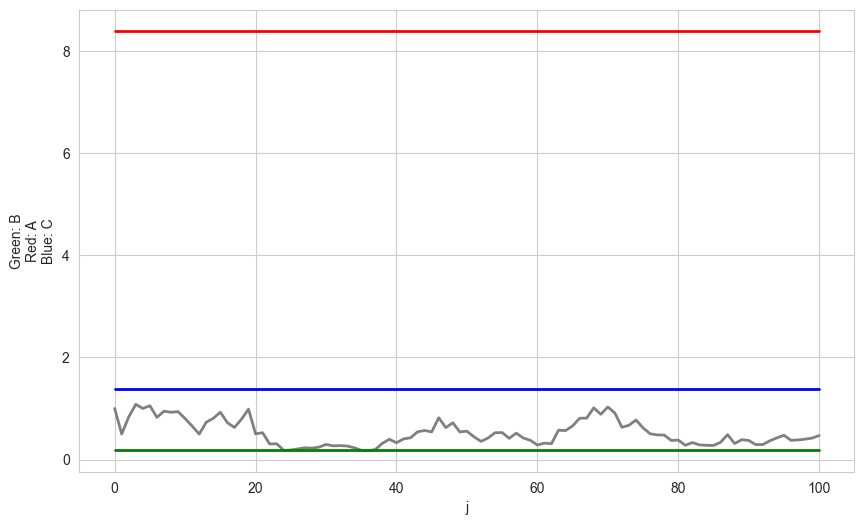

Z(n) = 0.47066


In [14]:
# График. Совмещенный график с критическим множеством

plt.figure(figsize=(10,6))
plt.plot(j, [Z(i) for i in j], linewidth = 2.0, color = "gray")
plt.plot(j, 0 * j + A, linewidth = 2.0, color = "red")
plt.plot(j, 0 * j + B, linewidth = 2.0, color = "green")
plt.plot(j, 0 * j + C, linewidth = 2.0, color = "blue")
plt.xlabel("j")
plt.ylabel("Green: B\nRed: A\nBlue: C")
plt.show()

print("Z(n) = %.5f" % Z(n))